# Allgemeine Relativitätstheorie mit dem Computer 
# (General Theory of Relativity on the Computer)

## Vorlesung gehalten an der 
## J.W.Goethe-Universität in Frankfurt am Main 
## (Sommersemester 2020)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 23.05.2020


## Erster Vorlesungsteil: Allgemeine Relativitätstheorie mit Python


## Die innere Schwarzschildlösung eines sph&auml;risch symetrischen, statischen Objektes (z.B. Erde, Neutronenstern)

### Von der Einstein Gleichung zur Tolman-Oppenheimer-Volkoff Gleichung (TOV) 
### Zusatz: Numerische Lösung der TOV Gleichungen

In den vorigen drei Vorlesungen wurde die Geodätengleichung in vorgegebener Schwarzschild Raumzeit für unterschiedliche Anfangsbedingungen numerisch analysiert. Die raumzeitliche Struktur, die Metrik, wurde hierbei als gegeben vorausgesetzt. In der folgenden Vorlesung betrachteten wir nun wie man die Metrik bei vorgegebener Materieverteilung berechnet. Die zugrundeliegende Gleichung die es hier zu lösen gilt ist die Einstein Gleichung
$$
G_{\mu\nu} = R_{\mu\nu} - \frac{1}{2} g_{\mu\nu} R ~=~ 8 \pi  \, T_{\mu\nu}
$$

Zunächst wird das Python Packet "GraviPy" eingebunden, welches auf dem Packet SymPy basiert und symbolische Berechnungen in der Allgemeinen Relativitätstheorie relativ einfach möglich macht.

In [1]:
from gravipy.tensorial import * 
import sympy as sym
import inspect
import numpy as np
import math
import matplotlib.pyplot as plt 
import matplotlib
sym.init_printing()

Im folgenden wird die Einsteingleichung einer sphärisch symetrischen und statischen Matrieverteilung betrachtet. Die Matrie wird hierbei als ideale Flüssigkeit angesetzt.

Wir definieren einen sphärisch symetrischen und statischen Ansatz der Metrik:
$$g_{\mu\nu}=\left( \begin{array}{ccc} 2\,\Phi(r) & 0 & 0 & 0\\ 0&  - \left(  1 - \frac{2 m(r)}{r} \right)^{-1}&  0&0 \\ 0&  0&  -r^2& 0\\ 0&  0&  0& -r^2 \hbox{sin}^2(\theta)\\ \end{array} \right) 
\qquad \hbox{mit:}\quad x^\mu=\left(t,r,\theta,\phi \right) \quad  ,
$$
wobei die Funktionen $\Phi(r)$ und $m(r)$ an dieser Stelle noch unbekannt sind und keine physikalische Bedeutung besitzen.

In [2]:
# define some symbolic variables
t, r, theta, phi, Spi = symbols('t, r, \\theta, \phi \pi')
Fphi = Function('\Phi')(r)
Fm = Function('m')(r)
# create a coordinate four-vector object instantiating 
# the Coordinates class
x = Coordinates('x', [t, r, theta, phi])
# define a matrix of a metric tensor components
Metric = diag(2*Fphi, -1/(1-2*Fm/r), -r**2, -r**2*sin(theta)**2)
# create a metric tensor object instantiating the MetricTensor class
g = MetricTensor('g', x, Metric)

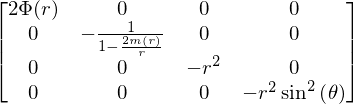

In [3]:
g(All, All)

Kontravariante Form der Metrik ($ g^{\mu\nu}$)

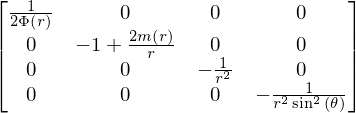

In [4]:
g(-All, -All)

Die Chistoffel Symbole in (kontravarianter Form): 
$$ \Gamma_{\rho \mu \nu} = g_{\rho \sigma}\Gamma^{\sigma}_{\ \mu \nu} = \frac{1}{2}(g_{\rho \mu| \nu} + g_{\rho \nu| \mu} - g_{\mu \nu| \rho})$$

Hier speziell $$ \Gamma_{2 2 2} = \Gamma_{r r r}$$

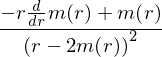

In [5]:
Ga = Christoffel('Ga', g)
Ga(2, 2, 2)

Der Riemann Tensor:
$$ R_{\mu \nu \rho \sigma} = \frac{\partial \Gamma_{\mu \nu \sigma}}{\partial x^{\rho}} - \frac{\partial \Gamma_{\mu \nu \rho}}{\partial x^{\sigma}} + \Gamma^{\alpha}_{\ \nu \sigma}\Gamma_{\mu \rho \alpha} - \Gamma^{\alpha}_{\ \nu \rho}\Gamma_{\mu \sigma \alpha} - \frac{\partial g_{\mu \alpha}}{\partial x^{\rho}}\Gamma^{\alpha}_{\ \nu \sigma} + \frac{\partial g_{\mu \alpha}}{\partial x^{\sigma}}\Gamma^{\alpha}_{\ \nu \rho} $$

Hier speziell $$ R_{1 3 1 3} =  R_{t \theta t \theta} $$

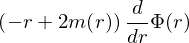

In [6]:
Rm = Riemann('Rm', g)
Rm(1,3,1,3)

Oder in gemischt kontra- kovarianter Form $$ R^{1}{}_{3 1 3} = R^{t}{}_{\theta t \theta}  $$

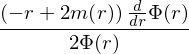

In [7]:
Rm(-1,3,1,3)

Der Ricci Tensor:

$$ R_{\mu \nu} = \frac{\partial \Gamma^{\sigma}_{\ \mu \nu}}{\partial x^{\sigma}} - \frac{\partial \Gamma^{\sigma}_{\ \mu \sigma}}{\partial x^{\nu}} + \Gamma^{\sigma}_{\ \mu \nu}\Gamma^{\rho}_{\ \sigma \rho} - \Gamma^{\rho}_{\ \mu \sigma}\Gamma^{\sigma}_{\ \nu \rho} $$

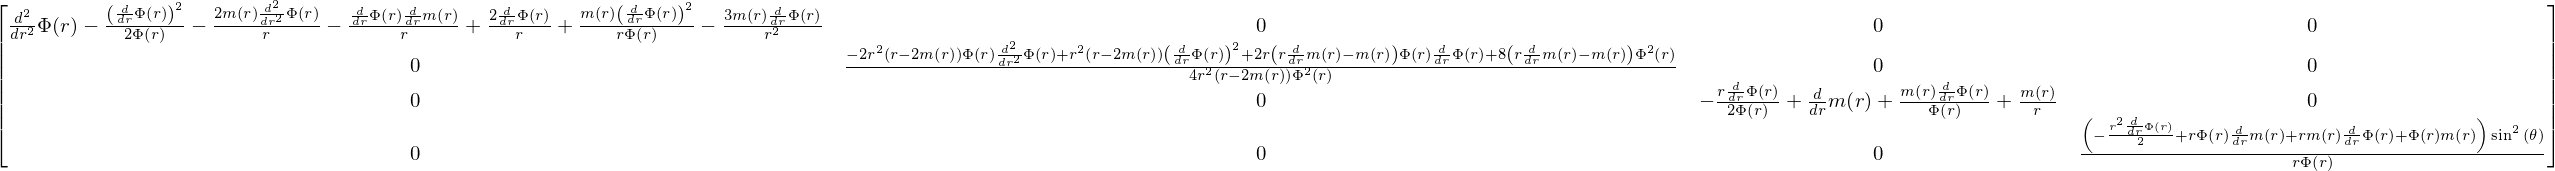

In [8]:
Ri = Ricci('Ri', g)
Ri(All, All)

Der Ricci Tensor lässt sich auch durch folgende Kontraktion aus dem Riemann Tensor berechnen:
$R_{\mu \nu} = R^{\rho}_{\ \mu \rho \nu} $

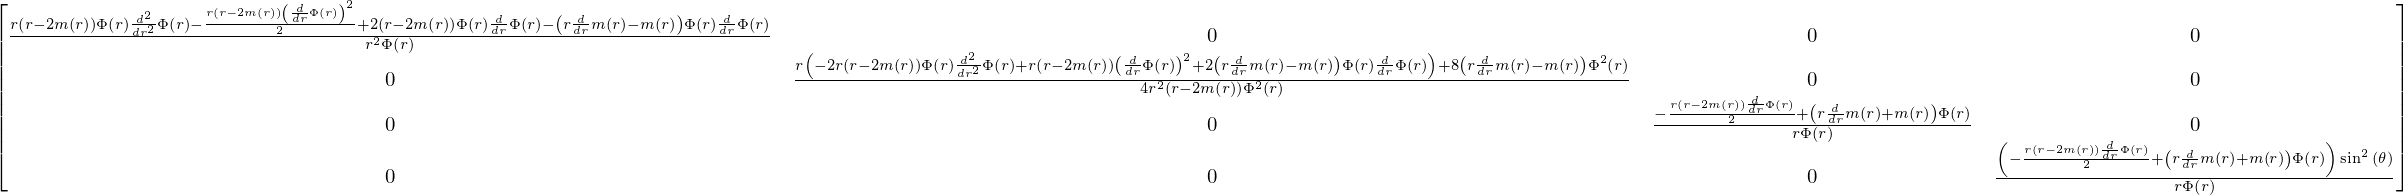

In [9]:
ricci = sum([Rm(i, All, k, All)*g(-i, -k)
             for i, k in list(variations(range(1, 5), 2, True))],
            zeros(4))
ricci.simplify()
ricci

Der Ricci Skalar ergibt sich aus der Kontraktion des Ricci Tensors: $R = R_{\mu}^{\ \mu} = g^{\mu \nu}R_{\mu \nu}$

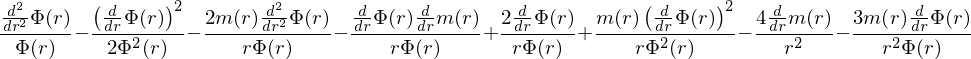

In [10]:
Ri.scalar()

Der Einstein Tensor:$$ G_{\mu \nu} = R_{\mu \nu} - \frac{1}{2}g_{\mu \nu}R $$

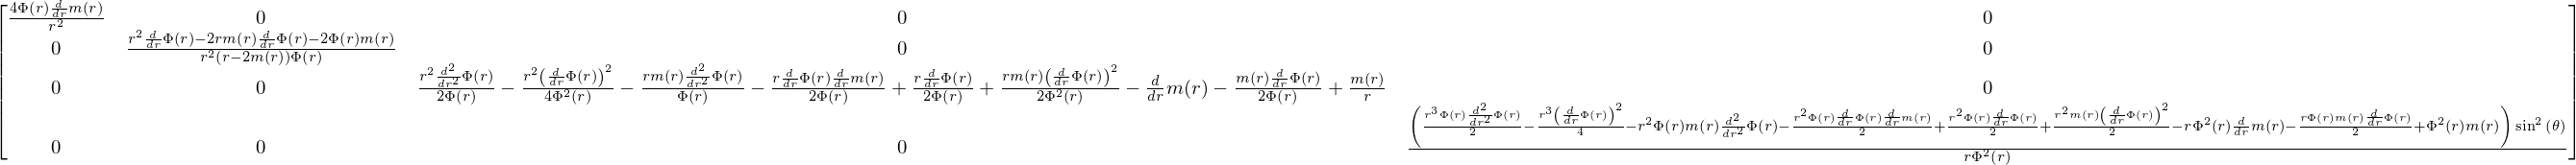

In [11]:
G = Einstein('G', Ri)
G(All, All)

Der Energie-Impuls Tensor (rechte Seite der Einsteingleichung) wird als ideale Flüssigkeit angesetzt:
$$ T^\mu{}\!_\nu=\left( \begin{array}{ccc} e(r) & 0 & 0 & 0\\ 0& -p(r)&  0&0 \\ 0&  0&  -p(r)& 0\\ 0&  0&  0& -p(r)\\ \end{array} \right) \quad  ,
$$
wobei die Funktionen $e(r)$ und $p(r)$ die Energiedichte und den Druck der Neutronensternmaterie darstellen, die ihrerseits &uuml;ber die Zustandsgleichung  $p(e)$ miteinander verknüpft sind.

Die Einstein Gleichung
$$ G^\mu{}\!_\nu = R^\mu{}\!_\nu - \frac{1}{2}g^\mu{}\!_\nu R =  8\pi T^\mu{}\!_\nu$$

stellt demnach (in dem betrachteten Fall) ein System von vier gekoppelten Differentialgleichungen zweiter Ordnung dar. 

In [12]:
e = Function('e')(r)
p = Function('p')(r)


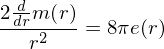

In [13]:
DGL1=sym.Eq(G(-1, 1), 8*Spi*e)
DGL1

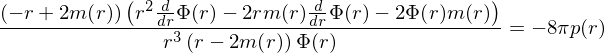

In [14]:
DGL2=sym.Eq(G(-2, 2), -8*Spi*p)
DGL2

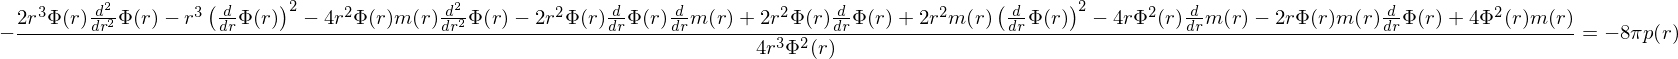

In [15]:
DGL3=sym.Eq(G(-3, 3), -8*Spi*p)
DGL3

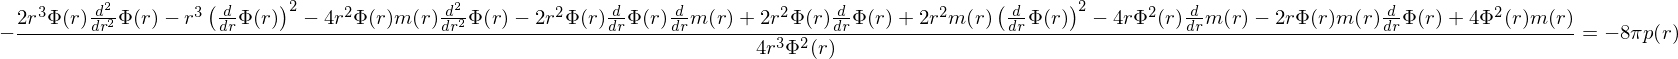

In [16]:
DGL4=sym.Eq(G(-4, 4), -8*Spi*p)
DGL4

Im folgenden lösen wir die erste Gleichung der Einsteingleichung (tt-Komponente) nach $\frac{dm}{dr}$ und die zweite Gleichung (rr-Komponente) nach $\frac{d\Phi}{dr}$ auf.

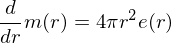

In [17]:
Eq1=sym.Eq(Fm.diff(r),sym.solve(DGL1,Fm.diff(r))[0])
Eq1

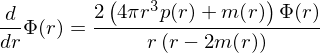

In [18]:
Eq2=sym.Eq(Fphi.diff(r),sym.solve(DGL2,Fphi.diff(r))[0])
Eq2

Aus der Einsteingleichung folgt die Erhaltung des Energie-Impulses. Diese sogenannten hydrodynamischen Gleichungen (kovariante Erhaltung des Energie-Impulses) sind durch die folgenden vier Gleichungen definiert (Bemerke: in der Literatur wird die kovariante Ableitung mit unterschiedlichen Symbolen bezeichnet):
$$
\nabla\!_\mu G^\mu{}\!_\nu = D\!_\mu G^\mu{}\!_\nu  =  G^\mu{}_{\nu \, ||\mu} = 0 \quad \rightarrow \quad \nabla\!_\mu T^\mu{}\!_\nu = 0 \quad ,
$$

wobei die kovariante Ableitung eines Tensors zweiter Stufe wie folgt definiert ist:
$$
\nabla\!_\alpha T^\mu{}\!_\nu = \partial_\alpha T^\mu{}\!_\nu + \Gamma^\mu_{\alpha \rho} T^\rho{}\!_\nu  - \Gamma^\rho_{\alpha \nu} T^\mu{}\!_\rho   \quad .
$$

Die kovariante Ableitung des Energie-Impulstensors $T^\mu{}\!_\nu$ berechnet sich wie folgt (hier ist z.B. die $\nabla\!_t T^t{}\!_r = \nabla\!_1 T^1{}\!_2$ ausgegeben)

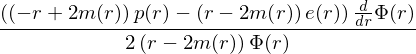

In [19]:
TM = sym.Matrix([[e*2*Fphi,0,0,0],[0,p/(1-2*Fm/r),0,0],[0,0,p*r**2,0],[0,0,0,p*r**2*sin(theta)**2]])
T = Tensor('T', 2, g, components=TM)
T.covariantD(-1,2,1)

Durch Kontraktion erhält man vier Gleichungen: $\nabla\!_\alpha T^\alpha{}\!_\nu=0\,\, \forall \, \nu=1,2,3,4$; die Gleichung für $\nu=2=r$ lautet:

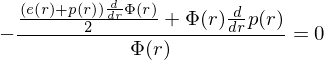

In [20]:
EqHydro2=sym.simplify(sym.Eq(T.covariantD(-1,2,1) + T.covariantD(-2,2,2) + T.covariantD(-3,2,3) + T.covariantD(-4,2,4),0))
EqHydro2

bzw. nach $\frac{d\Phi}{dr}$ umgeformt:

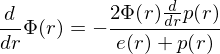

In [21]:
Eq3=sym.Eq(Fphi.diff(r),sym.solve(EqHydro2,Fphi.diff(r))[0])
Eq3

Durch Kombination dieser Gleichung mit der zweiten Einsteingleichung erhält man:

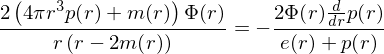

In [22]:
Eq4=sym.Eq(sym.solve(DGL2,Fphi.diff(r))[0],sym.solve(EqHydro2,Fphi.diff(r))[0])
Eq4

bzw. nach $\frac{dp}{dr}$ umgeformt:

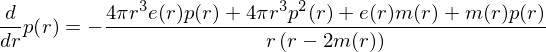

In [23]:
Eq5=sym.Eq(p.diff(r),sym.solve(Eq4,p.diff(r))[0])
Eq5

Man erhält somit das folgende System von Differentialgleichungen, die so genannten "Tolman-Oppenheimer-Volkoff Gleichung (TOV Gleichungen)"

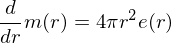

In [24]:
Eq1

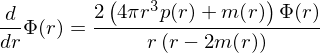

In [25]:
Eq2

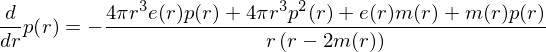

In [26]:
Eq5

### Numerische Lösung der TOV-Gleichungen 

Im folgenden werden die TOV Gleichungen numerisch gelöst, indem wir einerseits eine Zustandsgleichung der Materie (eine Funktion $p(e)$, hier speziell $p(e)=10\,e^{5/3}$)  festlegen und von einem Startwert der zentralen Energiedichte im Inneren des sphärisch symmetrischen Objektes nach Außen integrieren. 

In [27]:
TOV1=Eq1.subs(e,(p/10)**(3/5))

In [28]:
TOV2=sym.simplify(Eq5.subs(e,(p/10)**(3/5)))

In [29]:
TOV3=sym.simplify(Eq2.subs(e,(p/10)**(3/5)))

#### Lösen der TOV Gleichungen in Python

Das zugrundeliegende System von Differentialgleichungen lösen wir im folgenden mit der Funktion odeint aus dem SciPy-Paket 

#### Links

http://docs.scipy.org/doc/ 

Beispiel Lösen von DGLs mit odeint https://gertingold.github.io/eidprog/scipy.html

Tutorial sympy https://www.grund-wissen.de/informatik/python/_downloads/tutorial-scipy-sympy.pdf

In [30]:
from scipy import integrate
#help(integrate.odeint)

Wir schreiben jedoch zunächst das System der TOV-Gleichungen ein wenig um und benennen $m(r)=y_1$, $p(r)=y_2$ und $\Phi(r)=y_3$

In [31]:
y1, y2, y3 = symbols('y1, y2, y3')
TOV1a=TOV1.subs([(Fm,y1),(p,y2),(Spi,math.pi)])
TOV2a=TOV2.subs([(Fm,y1),(p,y2),(Spi,math.pi)])
TOV3a=TOV3.subs([(Fm,y1),(p,y2),(Fphi,y3),(Spi,math.pi)])

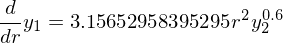

In [32]:
TOV1a

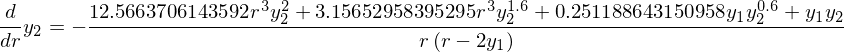

In [33]:
TOV2a

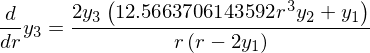

In [34]:
TOV3a

Zusätzlich benutzen wir die Funktion lambdify() um die numerischen Werte der TOV Gleichungen zu erhalten (siehe https://docs.sympy.org/latest/modules/utilities/lambdify.html ):

In [35]:
TOV1b=sym.lambdify([r,(y1,y2,y3)], TOV1a.rhs)

In [36]:
TOV2b=sym.lambdify([r,(y1,y2,y3)], TOV2a.rhs)

In [37]:
TOV3b=sym.lambdify([r,(y1,y2,y3)], TOV3a.rhs)

Wir definieren das Differentialgleichungssystem der TOV Gleichungen als eine Funktion

In [38]:
def DGLSysTOV(y, r):
    y1, y2, y3 = y
    dy1 = TOV1b(r,(y1,y2,y3))
    dy2 = TOV2b(r,(y1,y2,y3))
    dy3 = TOV3b(r,(y1,y2,y3))
    return np.array([dy1, dy2, dy3])

Zur numerischen Lösung (mittels der Funktion odeint()) müssen wir den eindimensionalen Raum der radialen Koordinate $r$ in einzelne Stützstellen aufteilen (hier speziell $r \in [10^{-14},30]$ mit $10000$ Punkten). Da die TOV Gleichungen bei $r=0$ singulär sind, beginnen wir die Integration einfach bei einem sehr kleinen Wert nahe Null ($10^{-14}$).

In [80]:
pts = np.linspace(10**(-14), 30, 10001)

Als Rand- bzw. Anfangsbedingungen der Integration setzen wir die integrierte Masse im Sternzentrum auf Null ($m(r=10^{-14})=0$), den zentralen Druck auf $p(r=10^{-14})=10\,(0.0005)^{5/3}$ und die Metrikkomponente $\Phi$ willkürlich zunächst auf Eins($\Phi(r=10^{-14})=1$).

In [81]:
Randbedingungen = np.array([0, 10*(0.0005)**(5/3), 1])

Das eigentliche Lösen der TOV Gleichung:

In [82]:
LoesTOV = integrate.odeint(DGLSysTOV, Randbedingungen, pts)

<string>:3: RuntimeWarning: invalid value encountered in double_scalars
<string>:3: RuntimeWarning: invalid value encountered in double_scalars


Wir können uns nun z.B. die Druckverteilung $p(r)$ im Sterninneren 

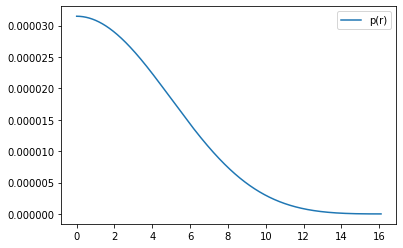

In [83]:
plt.clf()
fig, ax = plt.subplots(num=1)
ax.plot(pts, LoesTOV[:, 1], '-', label='p(r)')
ax.legend(loc='best')
plt.show()

, die Energiedichteverteilung $e(r)$

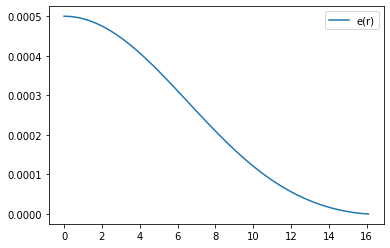

In [84]:
plt.clf()
fig, ax = plt.subplots(num=1)
ax.plot(pts, (LoesTOV[:, 1]/10)**(3/5), '-', label='e(r)')
ax.legend(loc='best')
plt.show()

, oder die Sternmasse $m(r)$ als Funktion des radialen Abstands $r$ vom Sternzentrum betrachten.

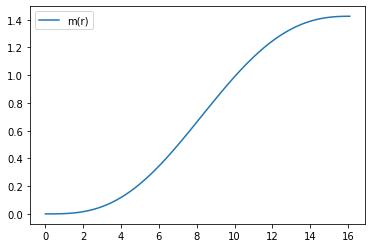

In [85]:
plt.clf()
fig, ax = plt.subplots(num=1)
ax.plot(pts, LoesTOV[:, 0], '-', label='m(r)')
ax.legend(loc='best')
plt.show()

Aufgrund des Birkov Theorems muss die Innenlösung der Metrik in die äussere Schwarzschildmetrik am Sternrand übergehen. Da wir nun die Gesamtmasse und den Radius des Sterns kennen, können wir auch die innere $g_{tt}$ und $g_{rr}$ Komponente der Metrik angeben. Der zuvor gewählte Randwert der Metrikkomponente $\Phi$  ($\Phi(r=10^{-14})=1$) war willkürlich gewählt und erst nachdem die Gesamtmasse und den Radius des Sterns durch die numerischen Lösung bekannt sind, kann man die wirkliche Form der $g_{tt}$-Komponente ($g_{tt}(r)=\Phi(r)$) durch eine y-Achsenverschiebung erhalten. Der Radius des Sterns beträgt (in km)

In [86]:
j=0
while math.isnan(LoesTOV[j, 0])==False:
    j=j+1
i=j-1
R=pts[i]
R

, seine Masse (in km)

In [87]:
M=LoesTOV[i, 0]
M

und seine $g_{tt}$-Komponente am Sternrand sollte dem Wert der Schwarzschildmetrik entsprechen: $g_{tt}(R)=\Phi(R)=(1-\frac{2M}{R})=$

In [88]:
Phi0=(1-2*M/R)
Phi0


In [89]:
abweichphi=LoesTOV[i, 2]-Phi0

Veranschaulichung der $g_{tt}$-Komponente der Innenraummetrik und Außenraummetrik. 

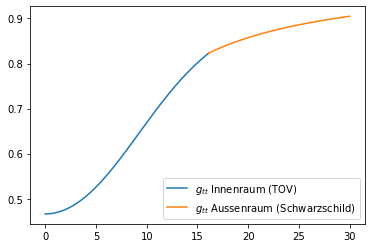

In [90]:
plt.clf()
fig, ax = plt.subplots(num=1)
ax.plot(pts, LoesTOV[:, 2]-abweichphi, '-', label='$g_{tt}$ Innenraum (TOV)')
ax.plot(pts[i:], (1-2*M/pts[i:]), '-', label='$g_{tt}$ Aussenraum (Schwarzschild)')
ax.legend(loc='lower right')
plt.show()

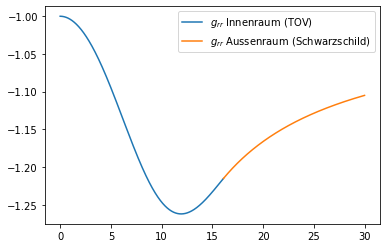

In [91]:
plt.clf()
fig, ax = plt.subplots(num=1)
ax.plot(pts, -(1-2*LoesTOV[:, 0]/pts[:])**(-1), '-', label='$g_{rr}$ Innenraum (TOV)')
ax.plot(pts[i:], -(1-2*M/pts[i:])**(-1), '-', label='$g_{rr}$ Aussenraum (Schwarzschild)')
ax.legend(loc='upper right')
plt.show()

Im folgenden wird eine Sequenz von Sternen mit unterschiedlichen zentralen Energiedichten-Werten berechnet. Trägt man die Gesamtmasse der einzelnen Sterne gegen deren Radius auf, so erhält man die Masse-Radius Beziehung. Jede Zustandsgleichung besitzt eine eigene Obergrenze, die sogenannte maximale Masse. Die Berechnung erfolgt durch eine for-Schleife über einen geeigneten zentralen Energiedichtebereich: 

In [92]:
pts = np.linspace(10**(-14), 30, 10001)
Liste0=[]
ListM=[]
ListR=[]
for e0 in np.linspace(0.0002, 0.004, 40):
    Randbedingungen = np.array([0, 10*(e0)**(5/3), 1])
    LoesTOV = integrate.odeint(DGLSysTOV, Randbedingungen, pts)
    j=0
    while math.isnan(LoesTOV[j, 0])==False:
        j=j+1   
    i=j-1
    Liste0.append(e0)
    ListR.append(pts[i])
    ListM.append(LoesTOV[i, 0])

<string>:3: RuntimeWarning: invalid value encountered in double_scalars
<string>:3: RuntimeWarning: invalid value encountered in double_scalars


Die berechnete Masse-Radius Beziehung können wir uns in einem R-M Diagramm darstellen:

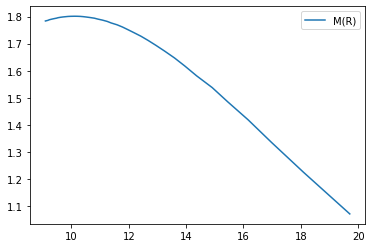

In [79]:
plt.clf()
fig, ax = plt.subplots(num=1)
ax.plot(ListR, ListM, '-', label='M(R)')
ax.legend(loc='best')
plt.show()